# Exercise 1: Model of a neuron and the learning process

## 1.1 Model of a neuron

Write a Python function, which calculates the output of a neuron. Assume a model of a neuron shown in Figure 1 with three inputs and a threshold. The threshold can be interpreted as an additional input with fixed input of $-1$ and weight $w_{10}$. The output of the function has to correspond to output of the neuron.

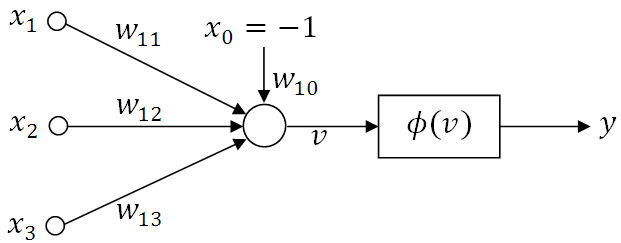

Figure 1. Model of a neuron

Use the scalar product of input vector $[x_0 x_1 x_2 x_3]$ and weights $[x_0 x_1 x_2 x_3]$ in order to calculate the neuron activation. The function has to have an additional input, which is used to select different nonlinear activation functions. The function should support the following nonlinear functions:

1. Step function
2. Piecewise linear function (ramp)
3. Sigmoid function defined as $\phi = \frac{1}{1+\exp (-av)}$, with $a=1$

**Tasks**

1. Write the code for calculating the aforementioned nonlinear functions and for the function which calculates the output of a neuron.

In [16]:
import numpy as np

def step_function(x):
    if x < 0:
        return 0
    
    return 1

def ramp_function(x):
    if x < 0:
        return 0
    
    return x

def sigmoid_function(x, a=1):
    return 1 / (1 + np.exp(-a * x))

def neuron(x, w, activation):
    x = np.insert(x, 0, -1)
    
    return activation(np.dot(x, w))


**Tasks**

1. Pick a random weight vector $\mathbf{w}$. Write down the chosen weights and print the neuron response for following inputs (for each activation function):

$x_1 = [0.5, 1, 0.7]^T$

$x_2 = [0, 0.8, 0.2]^T$


In [43]:
from IPython.display import display, Latex

def array_to_string(array) -> str:
    return f"[{', '.join([str(x) for x in array])}]"

weights = np.random.rand(4)

display(Latex(f"$\mathbf{{w}} = {array_to_string(weights)}$"))

x1=np.array([0.5, 1, 0.7])
x2=np.array([0, 0.8, 0.2])

display(Latex("$x_1 = [0.5, 1, 0.7]^T$"))
display(Latex("$x_2 = [0, 0.8, 0.2]^T$"))

display(Latex(f"Neuron response for $x_1$ and $\mathbf{{w}}$ with step function -> ${neuron(x1, weights, step_function)}$"))
display(Latex(f"Neuron response for $x_2$ and $\mathbf{{w}}$ with step function -> ${neuron(x2, weights, step_function)}$"))

display(Latex(f"Neuron response for $x_1$ and $\mathbf{{w}}$ with ramp function -> ${neuron(x1, weights, ramp_function)}$"))
display(Latex(f"Neuron response for $x_2$ and $\mathbf{{w}}$ with ramp function -> ${neuron(x2, weights, ramp_function)}$"))

display(Latex(f"Neuron response for $x_1$ and $\mathbf{{w}}$ with sigmoid function -> ${neuron(x1, weights, sigmoid_function)}$"))
display(Latex(f"Neuron response for $x_2$ and $\mathbf{{w}}$ with sigmoid function -> ${neuron(x2, weights, sigmoid_function)}$"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## 1.2 Three neuron network

Write a function for a three neuron network (Figure 2) using the function developed in section 1.1.. Assume that neurons use the sigmoid transfer function, where $a=1$ and assume the weights are given as follows:

$w_1=[1, 0.5, 1, -0.4]$

$w_2=[0.5, 0.6, -1.5, -0.7]$

$w_3=[-0.5, -1.5, 0.6]$

*Remark*: The first element of the weight vector is the threshold of a neuron and is shown as $w_{i0}$ in Figure 2.

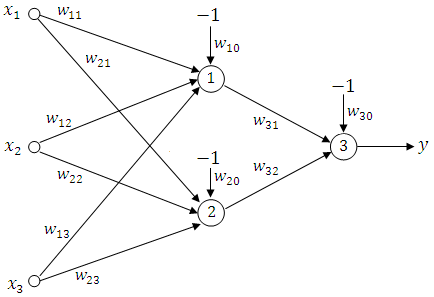

Figure 2. Three neuron network



**Tasks**

1. Write the code for calculating the output of the network shown in Fig. 2.

In [58]:
def three_neuron_network(x, w1=np.array([1, 0.5, 1, -0.4]), w2=np.array([0.5, 0.6, -1.5, -0.7]), w3=np.array([-0.5, -1.5, 0.6])):
    neuron_one_output = neuron(x, w1, sigmoid_function)
    neuron_two_output = neuron(x, w2, sigmoid_function)
    
    combined_output = np.array([neuron_one_output, neuron_two_output])
    
    return neuron(combined_output, w3, sigmoid_function)
 

**Tasks**

1. Print the output of the network for input given as $x=[0.3, 0.7, 0.9]^T$.
2. Does the output of the network depend on neuron weights?

In [67]:
x = np.array([0.3, 0.7, 0.9])

display(Latex(f"For input $x=[0.3, 0.7, 0.9]^T$ with the assigned weights the output is ${three_neuron_network(x)}$"))

w1 = np.array([1.5, 1, 1.5, 0.1])
w2 = np.array([1, 1.1, -1, -0.2])
w3 = np.array([0, -1, 1.1])

display(Latex(f"For the same input $x=[0.3, 0.7, 0.9]^T$ with different weights the output is ${three_neuron_network(x, w1, w2, w3)}$"))

w1 = np.array([2, 1.5, 2, 0.6])
w2 = np.array([1.5, 1.6, -0.5, 0.3])
w3 = np.array([0.5, -0.5, 1.6])

display(Latex(f"If we change the weights again for the same input $x=[0.3, 0.7, 0.9]^T$ the output is ${three_neuron_network(x, w1, w2, w3)}$"))

display(Latex("The output does indeed depend on the neuron weights."))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## 1.3 Delta rule

The goal of this experiment is to better understand the learning process. In this experiment we will implement a logical AND function using one neuron with two inputs and a threshold (see Figure 3). We will use the sigmoid nonlinear activation function with $a=1$.

For the learning phase, we have to define the following input output pairs $x_i$, $y_i$ for the logical AND function: for inputs $x_1=[-1, 0, 0]^T$, $x_2=[-1, 0, 1]^T$, and $x_3=[-1, 1, 0]^T$ the output $y$ should be equal to $0$; for input vector $x_4=[-1, 1, 1]^T$ the output value $y$ should be equal to $1$. The first component of all input vectors has value $-1$ and defines the neuron threshold visible as $w_{10}$ in Fig. 3. At the beginning we set the neuron weights to random values. We use the delta rule in order to update the weights:

$$\Delta w_{kj}=\eta e_{k}(n)x_{j}(n)$$

where

$$e_{k}(n)=d_{k}(n)-y_{k}(n)$$

where $d_{k}(n)$ is the expected neuron output and $y_{k}(n)$ is the obtained neuron output. This iterative procedure is repeated until the error is sufficiently small.

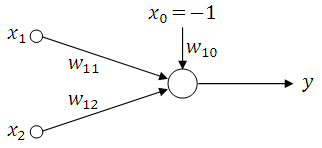

Figure 3. One neuron network

**Tasks**

1. Write the code which iteratively calculates the output of the network and uses the delta rule to update the weights until the error is sufficiently small. Experiment with different starting weights and different learning rates. (In case of instabilities, perform the experiment using a small learning rate, for example $\eta =0.05$). Show the error function ($y$-axis) and number of iterations ($x$-axis) for different learning rates.

    - What is the best learning rate? How does the learning rate affect the neural network?
    - How did you define the sufficiently small error used to terminate the algorithm?
    - After how many iterations does the algorithm terminate?


Error threshold 9.999620199461722e-06 reached after 31688 epochs.


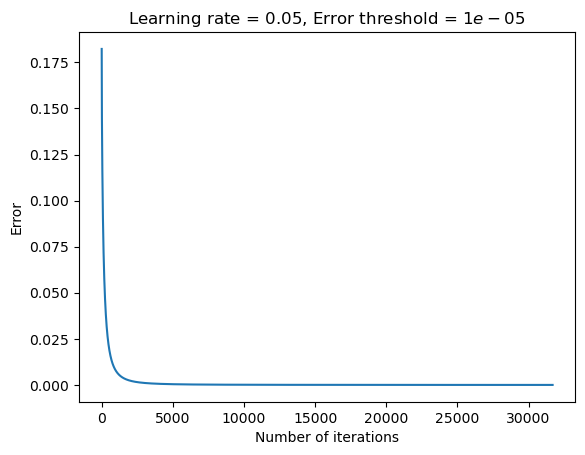

Error threshold 9.999794623329703e-07 reached after 34079 epochs.


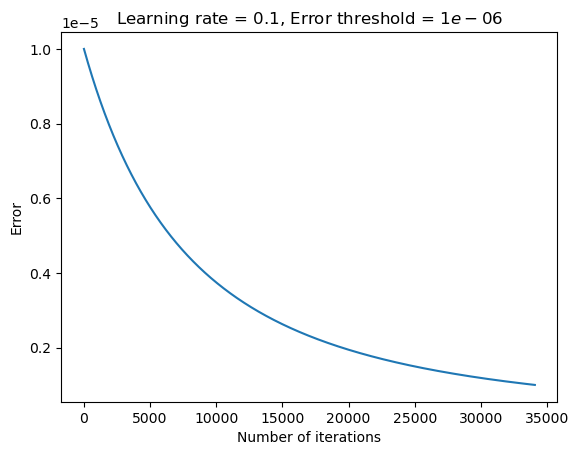

Error threshold 9.999933361727813e-08 reached after 53814 epochs.


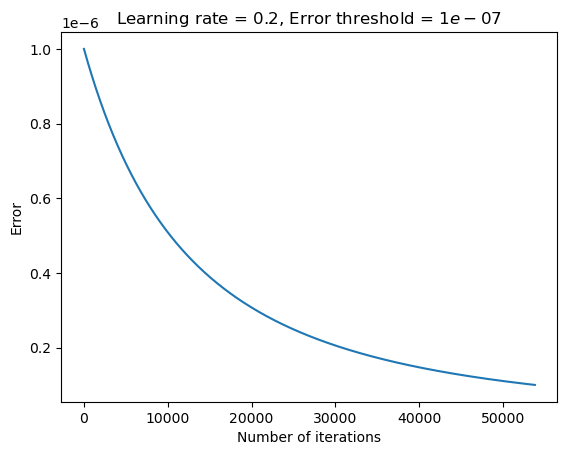

Error threshold 9.999807963176594e-09 reached after 68044 epochs.


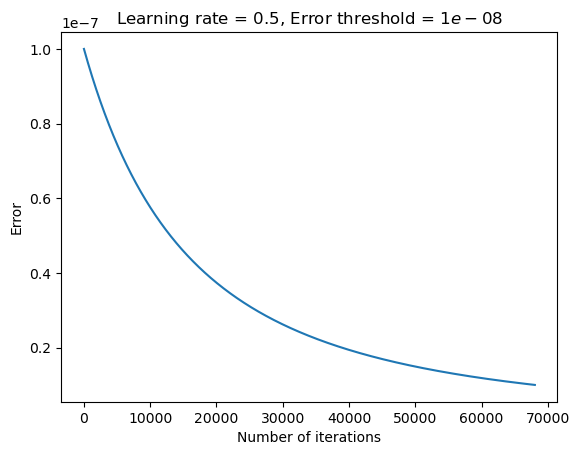

Final results:
Input: [0 0], Target: 0, Prediction: 0.0000000000
Input: [0 1], Target: 0, Prediction: 0.0001005015
Input: [1 0], Target: 0, Prediction: 0.0001005077
Input: [1 1], Target: 1, Prediction: 0.9998593261


In [119]:
import matplotlib.pyplot as plt

x1 = [0, 0]
x2 = [0, 1]
x3 = [1, 0]
x4 = [1, 1]
    
X = np.array([x1, x2, x3, x4])
Y = np.array([0, 0, 0, 1])
    
w = np.random.rand(3)

def train(X, Y, w, epochs=int(1e5), learning_rate=0.1, error_threshold=1e-8):    
    error_function_outputs = np.array([])
    
    for epoch in range(epochs):
        total_error = 0
        
        for x, y in zip(X, Y):
            neuron_output = neuron(x, w, sigmoid_function)
            error = y - neuron_output
            
            total_error += np.square(error)
            
            w += learning_rate * error * np.insert(x, 0, - 1)
        
        mean_error_squared = total_error / len(X)
        
        error_function_outputs = np.append(error_function_outputs, mean_error_squared)
        
        if mean_error_squared < error_threshold:
            print(f"Error threshold {mean_error_squared} reached after {epoch} epochs.")
            break
        
        if epoch == epochs - 1:
            print("Error threshold not reached")
    
    plt.plot(error_function_outputs)
    plt.title(fr"Learning rate = ${learning_rate}$, Error threshold = ${error_threshold}$")
    plt.xlabel("Number of iterations")
    plt.ylabel("Error")
    plt.show()
    
    return w

w = train(X, Y, w, learning_rate=0.05, error_threshold=1e-5)

w = train(X, Y, w, learning_rate=0.1, error_threshold=1e-6)

w = train(X, Y, w, learning_rate=0.2, error_threshold=1e-7)

w = train(X, Y, w, learning_rate=0.5, error_threshold=1e-8)

print("Final results:")

for x, y in zip(X, Y):
    neuron_output = neuron(x, w, sigmoid_function)
    
    print(f"Input: {x}, Target: {y}, Prediction: {neuron_output:.10f}")


1. What is the best learning rate? How does the learning rate affect the neural network?
    - In the case of my results the best learning rate was 0.5. Anything larger than that would cause the algorithm to finish in only a couple of epochs. I tried decreasing the error threshold but in that case the algorithm never converged.
2. How did you define the sufficiently small error used to terminate the algorithm?
    - First I chose the epoch count. The best fit for my machine was 100000. This produced a result within a few seconds. After that I chose an error threshold (some negative power of 10) which would cause the algorithm to converge within those 100000 epochs.
3. After how many iterations does the algorithm terminate?
    - Depends on the learning rate, error threshold and starting weights, but usually between 30k and 80k epochs.

# Exercise 2: Associative memory

## 2.1 Forming the correlation matrix directly

In this part of the exercise we will use the direct approach in forming the correlation matrix. Memory based on the correlation matrix should memorize input-output association pairs represented as vectors. For each input vector (key) the memory has to memorize the output pattern i.e. vector in an ASCII code formulation. In this example we will use 4-dimensional input and output vectors. Words (output vectos) that have to be memorized are: '*vrat*' , '*kraj*' , '*cres*' , '*otac*'. Vectors $b_i$, which represent those words should be formed as follows:

In [825]:
real=lambda x: np.array([[ord(character) for character in x]]).T

b1 = real("vrat")
b2 = real("kraj")
b3 = real("cres")
b4 = real("otac")

### 2.1.1 Orthogonal input vectors

This experiment demonstrates how to create an associative memory. Ortonormalized set of vectors defined as below

In [826]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

is used as input vector set (set of keys). We form the memory correlation matrix $\mathbf{M}$ using input output pairs as follows:

In [827]:
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]


In order to verify whether the memory is functioning properly, we have to calculate outputs for each input vector. For example, the output for the key $a_1$ can be obtained as follows:

In [828]:
import warnings

warnings.filterwarnings("ignore")

char = lambda x: "".join(map(chr, map(int, list(x))))

word = char(M@a1)
print(word)

vrat


**Tasks**

For each key, print the key and the corresponding output.
1. Were all input-output pairs memorized correctly?
2. How many input-output pairs would be memorized if vectors $a_i$ were not normalized?

In [829]:
for key in [a1, a2, a3, a4]:
    print(key.T, char(M@key))

[[1 0 0 0]] vrat
[[0 1 0 0]] kraj
[[0 0 1 0]] cres
[[0 0 0 1]] otac


Were all input-output pairs memorized correctly?
    - Yes they were.
    
How many input-output pairs would be memorized if vectors $a_i$ were not normalized?
    - If we denormalize the vectors (multiply each one by two for example) no values would be memorized

In [830]:
a5 = np.array([[2, 0, 0, 0]]).T
a6 = np.array([[0, 2, 0, 0]]).T
a7 = np.array([[0, 0, 2, 0]]).T
a8 = np.array([[0, 0, 0, 2]]).T

M = b1 * a5.T + b2 * a6.T + b3 * a7.T + b4 * a8.T
print(M)
print()

for key in [a5, a6, a7, a8]:
    print(key.T, char(M@key))

[[236 214 198 222]
 [228 228 228 232]
 [194 194 202 194]
 [232 212 230 198]]

[[2 0 0 0]] ǘǈƄǐ
[[0 2 0 0]] ƬǈƄƨ
[[0 0 2 0]] ƌǈƔǌ
[[0 0 0 2]] ƼǐƄƌ


### 2.1.2 Correlation matrix properties

The goal of this experiment is to demonstrate the capacity of obtained memory. In this part of the exercise we will try to memorize one more (fifth) word ('*mrak*'). In 4-dimensional vector space the maximum number of linearly independent vectors is four. Because of this fact, we pick an arbitrary unit vector as the fifth key, for example:

In [831]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

a5 = (a1 + a3) / np.sqrt(2)

Form vectors $b_5$ ('*mrak*') and $a_5$ as explained and add them into the memory using the following expression:

In [832]:
b5 = real("mrak")
M_five = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T + b5 * a5.T

**Tasks**

Once again, print each key and the corresponding output.
1. Was the new association properly memorized?
2. Did other associations stay correctly memorized?
    - If not - which were not memorized correctly and why?
    - If yes - which were memorized correctly and why?

In [833]:
for key in [a1, a2, a3, a4, a5]:
    print(key.T, char(M_five@key))

[[1 0 0 0]] ÃÂ¥¿
[[0 1 0 0]] kraj
[[0 0 1 0]] °Â©¾
[[0 0 0 1]] otac
[[0.70710678 0.         0.70710678 0.        ]] ĆēíĎ


Was the new association properly memorized?
    - No it wasn't
Did other associations stay correctly memorized?
    - 'kraj' and 'otac' were memorized correctly because their rows weren't modified with additional data
    - 'vrat' and 'cres' weren't memorized correctly because new data was added to rows 1 and 3 containing info about the word 'mrak'
    - 'mrak' wasn't memorized correctly because we already had data present in rows 1 and 3 containing info about the words 'vrat' and 'cres'

### 2.1.3 Word pairs as associations

In this experiment we will form the associative memory, which memorizes word pairs. The associations, which have to be memorized are: *ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*. Generate input vectors (keys) as follows:

In [834]:
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[47791 47867 46818 44624]
 [50264 50354 49352 47048]
 [43019 43124 42263 40271]
 [47892 48130 47019 44766]]


**Tasks**

1. What is the response for each input key?
2. Which associations were memorized correctly?
3. Which associations were not memorized correctly and why?
4. How can we fix this problem?

In [835]:
for key in [a1, a2, a3, a4]:
    try:
        print(char(key), char(M@key))
    except ValueError:
        print(char(key), (M@key).T)

ruka [[20386667 21465834 18378102 20464233]]
kset [[20523344 21611078 18502292 20601169]]
more [[20366732 21446046 18361188 20444190]]
mama [[19284008 20306138 17385053 19356211]]


What is the response for each input key?
    - There is no response because an error is thrown (`chr() arg not in range(0x110000)`)
Which associations were memorized correctly?
    - None of them
Which associations were not memorized correctly and why?
    - All of them because the values were too large
How can we fix this problem?
    - We can fix this by orthogonalizing the input vectors

### 2.1.4 Input vector orthogonalization

In this experiment we show an associative memory, which uses keys that are orthonormalized. We use the Gram-Schmidt orthogonalization method as follows. We first form the matrix $\mathbf{A}$ using vectors $a_i$:

In [871]:
A=np.hstack([a1, a2, a3, a4])

After this step we perform the orthonormalization step:

In [872]:
from scipy.linalg import orth

C=orth(A.T)

We extract individual orthonormal vectors $c_i$:

In [873]:
c1=np.array([C[0]]).T
c2=np.array([C[1]]).T
c3=np.array([C[2]]).T
c4=np.array([C[3]]).T

In the next step we form a new matrix $\mathbf{M}$ using vectors $c_i$ instead of vectors $a_i$ when creating the matrix $\mathbf{M}$.

In [874]:
M = b1 * c1.T + b2 * c2.T + b3 * c3.T + b4 * c4.T

**Tasks**

Verify the responses of matrix $\mathbf{M}$ with vectors $c_i$ as inputs.
1. What is the effect of vector orthonormalization?
2. How many pairs were correctly memorized?
3. What can we expect when normalizing the vectors?
4. What can we expect when only orthogonalizing the vectors?
5. What can we expect if vectors $c_i$ are linearly independent but not orthogonal?

In [876]:
for key in [c1, c2, c3, c4]:
    try:
        print(char(key), char(M@key))
    except ValueError:
        print("Missing value")

     uq`s
     jq`i
     bqdr
     ns`b


What is the effect of vector orthonormalization?
    - Vectors become both orthogonal and normalized and this reduces noise
How many pairs were correctly memorized?
    - Zero
What can we expect when normalizing the vectors?
    - Each value in the vector will be between 0 and 1
What can we expect when only orthogonalizing the vectors?
    - Values might be too large which will cause a `ValueError` like in section 2.1.3
What can we expect if vectors $c_i$ are linearly independent but not orthogonal?
    - The scalar product of linearly independent vectors can be different from zero which can lead to noise, unlike the scalar product of orthogonal vectors which is always zero

### 2.1.5 Finding the correlation matrix using matrix inversion

For previously used word pairs (*ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*) find a $4\times 4$ correlation matrix $\mathbf{M}$ as $\mathbf{M} = \mathbf{B}\mathbf{A}^{-1}$, where matrix $\mathbf{B}$ is defined as:

In [438]:
B=np.hstack([b1, b2, b3, b4])
M=B@np.linalg.inv(A)

**Tasks**

1. Were all associations properly memorized? Remark: The result should be rounded to the nearest number before comparison.

In [439]:
for key in [a1, a2, a3, a4]:
    print(char(key), char(np.round(M@key)))

ruka vrat
kset kraj
more cres
mama otac


Were all associations properly memorized? Remark: The result should be rounded to the nearest number before comparison.
    - All associations were properly memorized.

### 2.1.6 Finding the correlation matrix using pseudo-inversion

A pseudo-inverse matrix can be used in order to find the correlation matrix when number of associations is larger than dimensionality of vectors representing the associations. In this case, the correlation matrix can be found as $\mathbf{M} = \mathbf{B}\mathbf{A}^{+}$, where $\mathbf{A}^{+}$ is a pseudo-inverse matrix defined as $\mathbf{A}^{+} = \mathbf{A}^{T}(\mathbf{A}\mathbf{A}^{T})^{-1}$.

Assume that the vectors $a_i$ and $b_i$ are defined previously (five associations in total). Find the pseudo-inverse matrix for this case.

In [451]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

a5 = (a1 + a3) / np.sqrt(2)

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
A_pseudo=A.T@np.linalg.inv(A@A.T)
M=B@A_pseudo

**Tasks**

1. Were all pairs memorized correctly?
2. If not, what is the error between expected and obtained values?

In [458]:
for key, expected in zip([a1, a2, a3, a4, a5], [b1, b2, b3, b4, b5]):
    print(f"{key.T}, {char(np.round(M@key))}, error={(M@key - expected).T}")

[[1 0 0 0]], faR`, error=[[-15.71268043 -16.69491347 -15.20532111 -19.91978721]]
[[0 1 0 0]], kraj, error=[[0. 0. 0. 0.]]
[[0 0 1 0]], SaV_, error=[[-15.71268043 -16.69491347 -15.20532111 -19.91978721]]
[[0 0 0 1]], otac, error=[[0. 0. 0. 0.]]
[[0.70710678 0.         0.70710678 0.        ]], w, error=[[22.22108576 23.61017306 21.50357134 28.17083323]]


Were all pairs memorized correctly?
    - No, only pairs 'kset' 'kraj' and 'mama' 'otac' because rows a1 and a3 were used to create row a5. This means that pairs in rows a1, a3, and a5 weren't memorized correctly.
If not, what is the error between expected and obtained values?
    - Errors between the expected and obtained values are displayed above

## 2.2 Finding the correlation matrix using supervised learning

This experiment shows us how to form the matrix $\mathbf{M}$ using supervised learning. In two following experiments we will use learning with error correction.

### 2.2.1 Learning with error correction

Form matrices $\mathbf{A}$ and $\mathbf{B}$ where each contains 4 vectors stacked in columns as explained in previous experiments. Check the contents of obtained matrices with following operations:

In [733]:
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")

b1 = real("vrat")
b2 = real("kraj")
b3 = real("cres")
b4 = real("otac")

A = np.hstack([a1, a2, a3, a4])
B = np.hstack([b1, b2, b3, b4])

In order to start the learning procedure we have to initialize the matrix $\mathbf{M}$ (For example, random values uniformly generated in $[-0.5, 0.5]$ interval):

In [734]:
M_initial = np.random.rand(4, 4)-0.5

For the learning part use the function *trainlms*, which is the implementation of the Widrow-Hoff LMS learning algorithm. The function can be used as follows:

In [735]:
def trainlms(A, B, M, ni, max_num_iter, min_err=0.02):
    d=B
    x=A
    w=M

    n=0
    err=[]
    while (n<max_num_iter):
        n+=1
        e=d-w@x
        w+=ni*np.dot(e, x.T)
        err.append(np.sum(np.sum(np.multiply(e, e))))
        if (err[-1]<min_err):
            break
    return w, err

where *max_num_iter* is the number of iterations and *ni* is the learning rate. Find the *max_num_iter* variable experimentally. For *ni* you can use:

In [736]:
ni=0.9999/np.linalg.eig(A @ A.T)[0].max()

The function trainlms performs the learning until SSE drops below $0.02$ or maximum number of iterations is performed. After the learning phase, look at the responses of the correlation matrix $\mathbf{M}$:

In [737]:
M, e = trainlms(A, B, M_initial.copy(), ni, 100000)

If we type

In [738]:
np.round(M@A) == B

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

we will see, which characters were properly reconstructed: the positions with correct reconstructions will have value *True* and  other positions will have value *False*. By calling the *trainlms* multiple times we can extend the learning process and maybe increase the number of memorized characters but the proper way to extend the learning process is to increase the *max_num_iter* variable. We can draw a graph, which plots the error with number of iterations (in logaritmic scale) using the following commands:

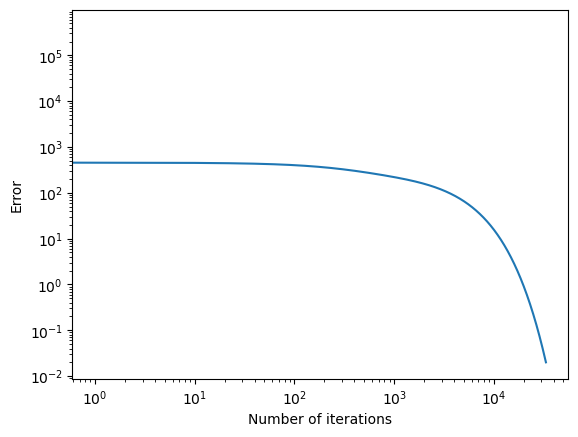

In [739]:
plt.plot(e)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

**Tasks**

1. Plot a graph showing number of memorized characters tied to number of used iterations. (Caution: When building the graph, start the simulation with the same starting matrix.)

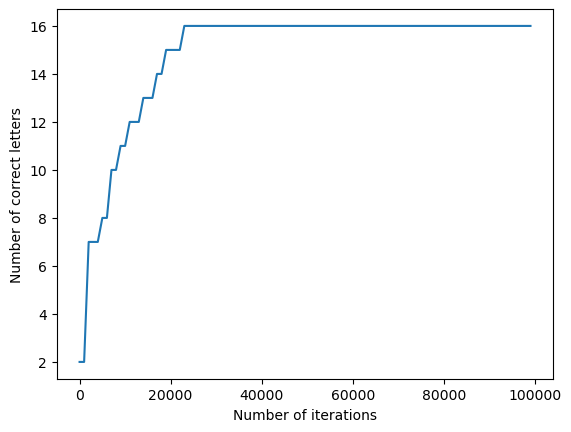

In [747]:
memorized_count = []
iterations = range(1, 100000, 1000)

# too slow to go one by one...
for i in iterations:
    new_M, _ = trainlms(A, B, M_initial.copy(), ni, i)
    memorized_count.append(np.sum(np.round(new_M@A)==B))

plt.plot(iterations, memorized_count)
plt.xlabel("Number of iterations")
plt.ylabel("Number of correct letters")
plt.show()

## 2.2.2 Effect of larger number of associations

This experiment demonstrates the capacity of the associative memory. What is the capacity of a $4\times 4$ correlation matrix based associative memory?

**Tasks**
1. For additional pair '*auto*'-'*mrak*' create vectors $a_5$ and $b_5$ as explained in the previous part of the exercise. Create new matrices A and B with dimensions $4$ (rows) $\times$ $5$ (columns) in the same way as previously explained. Initialize the matrix $\mathbf{M}$ with random starting values.

In [793]:
a5 = real("auto")
b5 = real("mrak")

A = np.hstack([a1, a2, a3, a4, a5])
B = np.hstack([b1, b2, b3, b4, b5])

M = np.random.rand(4, 4) - 0.5
print(M)

[[-0.06215276 -0.22059981 -0.1778306   0.12436315]
 [ 0.1639622  -0.20248123  0.34857862  0.41822962]
 [ 0.41753306  0.00131546 -0.36921503 -0.35693756]
 [-0.04584815 -0.43181456 -0.31210492 -0.19785476]]


Use the *trainlms* function in the following way:

In [794]:
ni = 0.9999 / max(np.linalg.eig(np.dot(A, A.T))[0])

M, e = trainlms(A, B, M, ni, 100000)

print(f"Memorized characters: {np.sum(np.round(np.dot(M, A)) == B)}")
print(f"SSE error: {e[-1]}")

Memorized characters: 2
SSE error: 219.79844711685456


**Tasks**

1. How many iterations did you use?
2. How many characters were memorized correctly?
3. What is the SSE error?
4. What happens if we call the function from the beginning?
5. How many characters are correctly memorized now and how large is the mistake? Is there any difference and why?
6. Is it possible to train this network in order to memorize all five associations?
7. Why? (Explain the previous answer)

How many iterations did you use?
    - 100k
How many characters were memorized correctly?
    - Two
What is the SSE error?
    - Around 219, depending on the starting matrix M, but it doesn't fall below that value
What happens if we call the function from the beginning?
    - We call the trainlms function again with the new "trained" matrix M
How many characters are correctly memorized now and how large is the mistake? Is there any difference and why?
    - There are still only two memorized characters. By adding the pair 'auto' 'mrak' we lost some data which we can't get back no matter the amount of training.
Is it possible to train this network in order to memorize all five associations?
Why? (Explain the previous answer)
    - No, because we added a pair and extended the original 4x4 matrix we lost some of the data that was there beforehand. We can now only access some of the previously stored pairs. This means we can't improve the accuracy of the network beyond a certain point.